In [1]:
import numpy as np
import pandas as pd
import string
from bokeh.plotting import figure, show, output_notebook, gridplot
from bokeh.models import HoverTool, ColumnDataSource, FuncTickFormatter
#import cx_Oracle
from bokeh.models.markers import Circle

output_notebook()

Loading BokehJS ...

In [2]:
def genHeatMapFrmFile(csvfile):        
    pltcode = csvfile[:-4]
    with open(csvfile,'r') as f:
        content = f.readlines()
    ncontent = np.zeros(len(content))
    for i,j in enumerate(content):
        ncontent[i] = float(j[:-1]) #remove \n carriage return
    colCnt = int(len(ncontent)/16)
    ncontent=ncontent.reshape(16,colCnt).T.reshape(1,len(content))[0]
    nphist = np.histogram(a=ncontent,bins=8)
    colourBlue = list(reversed(['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']))
    lamDiff = lambda x: [abs(x-i) for i in nphist[1]].index(min([abs(x-i) for i in nphist[1]]))
    bin_colours=[]
    for i in ncontent:
        bin_category = lamDiff(i)
        bin_colours.append(bin_category)
    colours = [colourBlue[i] if i<8 else colourBlue[7] for i in bin_colours] #bc the binning has 9 elemnts due to bin edges
    xs = list(map(lambda x: [x]*16,list(range(3,15)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = {'xs':xs,'ys':strings,'value':ncontent.tolist(),'colour':colours}
    output_file(f"{pltcode}_bokeh.html", title=f"Heatmap of {pltcode}", mode="cdn")
    p = figure(plot_width=1000,plot_height=1000,x_axis_location="above", tools="hover,save",
               title=f'Heatmap of {pltcode} 384-plate', 
               x_range=[str(i) for i in range(3,15)],
               y_range=list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=df, color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    return p

In [337]:
dfm1 = pd.read_csv('14190301100.txt',encoding='utf-16',sep='\t',skiprows=2,skipfooter=2,engine='python')
dfm2 = pd.read_csv('14190301200.txt',encoding='utf-16',sep='\t',skiprows=2,skipfooter=2,engine='python')

In [4]:
dfm.head(10)

,Wavelength,Temperature(¡C),A1,A2,A3,A4,A5,A6,A7,A8,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,Unnamed: 386
0,220,28.2,-0.046316,-0.047916,0.204984,0.215384,0.218284,0.184984,0.191684,0.193384,...,0.218284,0.218284,0.218284,0.218284,0.218284,0.218284,0.029284,0.218284,0.218284,NaN
1,230,28.3,-0.003822,-0.004722,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,...,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.036978,0.102478,0.102478,NaN
2,240,28.3,-0.027734,-0.026534,0.177966,0.149666,0.325466,0.184166,0.191266,0.153266,...,0.208166,0.159566,0.170366,0.139466,0.183366,0.210966,0.000266,0.208966,0.190666,NaN
3,250,28.3,-0.022066,-0.025966,0.060034,0.037034,0.178534,0.058234,0.068534,0.064634,...,0.110834,0.037034,0.046934,0.023334,0.082834,0.077234,-0.011566,0.078234,0.085634,NaN
4,260,28.3,-0.032922,-0.037422,0.010078,-0.001322,0.102678,0.022278,0.014978,0.023978,...,0.083178,0.034078,0.055178,0.011178,0.076878,0.058178,-0.010422,0.062278,0.076578,NaN
5,270,28.4,-0.074816,-0.083916,-0.058216,-0.053316,0.016584,-0.047916,-0.041916,-0.058516,...,0.001484,-0.009016,-0.002916,-0.018116,-0.004316,0.026484,-0.036016,0.029384,0.015384,NaN
6,280,28.4,-0.041988,-0.050287,-0.017088,-0.019987,0.063012,-0.008387,0.001112,-0.006088,...,0.014313,-0.003688,0.013912,-0.009888,0.022812,0.055112,-0.028587,0.044013,0.047912,NaN
7,290,28.4,0.006472,-0.003528,0.035872,0.024972,0.133272,0.040472,0.044372,0.023172,...,0.014172,0.002672,0.008872,0.000572,0.021772,0.072272,-0.023028,0.064172,0.055072,NaN
8,300,28.4,0.006244,0.000944,0.036144,0.027344,0.112444,0.032644,0.042944,0.016644,...,0.018144,0.019344,0.014944,0.013644,0.017244,0.069844,-0.009956,0.070944,0.042244,NaN
9,310,28.4,0.003744,-0.000156,0.027544,0.023244,0.087844,0.020844,0.038844,0.012744,...,0.019744,0.018544,0.012144,0.013044,0.012544,0.057044,-0.006756,0.065844,0.035044,NaN


In [3]:
wellIds=[]
for i in range(1,25):
    for j in range(1,25):
        wellIds.append(f'{chr(64+i)}{j}' )

In [4]:
def genLinePlot(dfm,colm):
    dfm = dfm.drop(dfm.columns[1], axis=1) #remove temperature
    dfm = dfm.drop(dfm.columns[len(dfm.columns)-1],axis=1) #remove last NaN column
    df = pd.DataFrame({'xs':dfm.Wavelength,'ys':dfm[f'{wellIds[colm]}']})
    source = ColumnDataSource(df)
    p = figure(plot_width=400, plot_height=400,tooltips = [('wavelength', '@xs'), ('absorbance', '@ys')])
    p.line('xs','ys', line_width=2,source=source)
    glyph = Circle(x="xs", y="ys", line_color="#3288bd", fill_color='#3288bd',line_width=1,size=6)
    p.add_glyph(source, glyph)
    p.axis.visible = False
    p.toolbar.logo = None
    p.toolbar_location = None
    p.ygrid.grid_line_color = None
    p.xgrid.grid_line_color = None
    return p

In [5]:
def genLolOfLinePlts(number):
    plotLst = []
    for i in range(number):
        plotLst.append(genLinePlot(dfm,i)) #generate each line plot
    lol = [list(map(lambda x: x+(j-1)*5,list(range(1,6)))) for j in range(1,5)] #initialise list of lists
    cnt = 0
    for i in range(len(lol)):
        for j in range(5):
            lol[i][j] = plotLst[cnt]
            cnt+=1
    return lol

In [45]:
p = gridplot(lol,toolbar_options={'logo':None})
show(p)

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_svg import FigureCanvasSVG
from matplotlib.figure import Figure
import io
from IPython.display import display, Image, SVG

def stripDF(dfm):
    dfm_strip = dfm.drop(dfm.columns[0], axis=1) #remove wavelength
    dfm_strip = dfm_strip.drop(dfm.columns[1], axis=1) #remove temperature
    dfm_strip = dfm_strip.drop(dfm.columns[len(dfm.columns)-1],axis=1) #remove last NaN column
    return dfm_strip


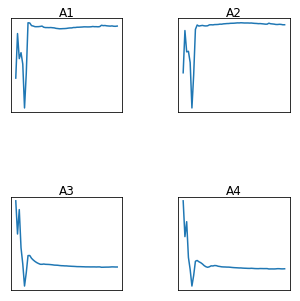

In [14]:
fig, ax = plt.subplots(2,2,figsize=(5,5))
fig.subplots_adjust(wspace=0.5,hspace=0.9)
cnt=0
dfm_strip = dfm.drop(dfm.columns[0], axis=1) #remove wavelength
dfm_strip = dfm_strip.drop(dfm.columns[1], axis=1) #remove temperature
dfm_strip = dfm_strip.drop(dfm.columns[len(dfm.columns)-1],axis=1) #remove last NaN column
for i in range(2):
    for j in range(2):
        ax[i,j].plot(dfm.Wavelength,
                     dfm_strip[f'{wellIds[cnt]}'],    
                    )
        ax[i,j].set_title(f'{dfm_strip.columns[cnt]}')
        ax[i,j].title.set_position([.5, .95])
        ax[i,j].tick_params(
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            left=False,         # ticks along the top edge are off
            labelbottom=False,
            labelleft=False)
        cnt+=1

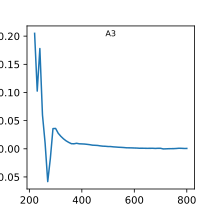

In [52]:
def build_graph(dfm,wavelength,cnt):
    img = io.BytesIO()
    fig = Figure(figsize=(3,3))

    axis = fig.add_subplot(1,1,1)
    
    absvals = dfm[f'{wellIds[cnt]}'] 
    axis.plot(wavelength,absvals)
    axis.set_title(f'{dfm.columns[cnt]}',fontsize=8)
    axis.title.set_position([.5, .9])
#    axis.tick_params(
            #which='both',
            #bottom=False,
            #left=False,
            #labelbottom=False,
            #labelleft=False)
    FigureCanvasSVG(fig).print_svg(img)
    return img.getvalue()

pln = build_graph(stripDF(dfm),wavelength,2)
display(SVG(pln))

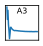

In [9]:
wavelength = list(range(220,810,10))

pln = build_graph(stripDF(dfm),wavelength,2)
display(SVG(pln))

In [83]:
np.histogram(np.array(stripDF(dfm).iloc[11,:]),bins=10)

(array([350,  19,   7,   3,   2,   1,   0,   1,   0,   1]),
 array([-0.015575,  0.108485,  0.232545,  0.356605,  0.480665,  0.604725,
         0.728785,  0.852845,  0.976905,  1.100965,  1.225025]))

In [338]:
d1 = stripDF(dfm1)
d2 = stripDF(dfm2)

In [349]:
row=16
dfmcrude = d1.iloc[row,:]
dfmfx = d2.iloc[row,:]
darray_crude = np.array(dfmcrude).reshape(16,24)
darray_fx = np.array(dfmfx).reshape(16,24)
ar_crude_t = np.flip(np.flip(darray_crude.reshape(16,24).T,axis=1),axis=0).reshape(16,24) #flip the 100 plate
ar_crude = np.delete(np.delete(np.delete(darray_crude, np.s_[1::2], 1),[0],1),np.s_[1::2],0) #filter elements so that only obtain the first value of each quadrant
ar_crude_t = np.delete(np.delete(np.delete(dft, np.s_[1::2], 1),[0],1),np.s_[1::2],0) #filter elements as above but for tranposed plate
ar_fx7 = np.delete(np.delete(np.delete(darray_fx, np.s_[::2], 1),[0],1),np.s_[0::2],0) #filter elemnts for 7th fx
ar_fx6 = np.delete(np.delete(np.delete(darray_fx, np.s_[1::2], 1),[0],1),np.s_[0::2],0)
corr6 = (np.corrcoef(ar_crude.flatten(),ar_fx6.flatten())[0][1],np.corrcoef(ar_crude_t.flatten(),ar_fx6.flatten())[0][1])
corr7 = (np.corrcoef(ar_crude.flatten(),ar_fx7.flatten())[0][1],np.corrcoef(ar_crude_t.flatten(),ar_fx7.flatten())[0][1])

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,-0.046316,-0.047916,0.204984,0.215384,0.218284,0.184984,0.191684,0.193384,0.205784,0.173684,...,0.218284,0.218284,0.218284,0.218284,0.218284,0.218284,0.218284,0.029284,0.218284,0.218284
1,-0.003822,-0.004722,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,...,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.102478,0.036978,0.102478,0.102478
2,-0.027734,-0.026534,0.177966,0.149666,0.325466,0.184166,0.191266,0.153266,0.191166,0.140566,...,0.177166,0.208166,0.159566,0.170366,0.139466,0.183366,0.210966,0.000266,0.208966,0.190666
3,-0.022066,-0.025966,0.060034,0.037034,0.178534,0.058234,0.068534,0.064634,0.065734,0.037534,...,0.046434,0.110834,0.037034,0.046934,0.023334,0.082834,0.077234,-0.011566,0.078234,0.085634
4,-0.032922,-0.037422,0.010078,-0.001322,0.102678,0.022278,0.014978,0.023978,0.017078,-0.000022,...,0.031078,0.083178,0.034078,0.055178,0.011178,0.076878,0.058178,-0.010422,0.062278,0.076578
5,-0.074816,-0.083916,-0.058216,-0.053316,0.016584,-0.047916,-0.041916,-0.058516,-0.037616,-0.071716,...,-0.004016,0.001484,-0.009016,-0.002916,-0.018116,-0.004316,0.026484,-0.036016,0.029384,0.015384
6,-0.041988,-0.050287,-0.017088,-0.019987,0.063012,-0.008387,0.001112,-0.006088,0.003613,-0.035388,...,-0.006888,0.014313,-0.003688,0.013912,-0.009888,0.022812,0.055112,-0.028587,0.044013,0.047912
7,0.006472,-0.003528,0.035872,0.024972,0.133272,0.040472,0.044372,0.023172,0.050172,-0.005228,...,0.012072,0.014172,0.002672,0.008872,0.000572,0.021772,0.072272,-0.023028,0.064172,0.055072
8,0.006244,0.000944,0.036144,0.027344,0.112444,0.032644,0.042944,0.016644,0.051044,0.002744,...,0.030344,0.018144,0.019344,0.014944,0.013644,0.017244,0.069844,-0.009956,0.070944,0.042244
9,0.003744,-0.000156,0.027544,0.023244,0.087844,0.020844,0.038844,0.012744,0.041444,0.001844,...,0.028344,0.019744,0.018544,0.012144,0.013044,0.012544,0.057044,-0.006756,0.065844,0.035044


In [331]:
dft = np.flip(np.flip(darray.reshape(16,24).T,axis=1),axis=0).reshape(16,24)
dfnormal = darray
dfcrude = np.delete(np.delete(np.delete(darray, np.s_[1::2], 1),[0],1),np.s_[1::2],0)
dftranspose = np.delete(np.delete(np.delete(dft, np.s_[1::2], 1),[0],1),np.s_[1::2],0)
dffx7 = np.delete(np.delete(np.delete(darray, np.s_[::2], 1),[0],1),np.s_[0::2],0)
dffx6 = np.delete(np.delete(np.delete(darray, np.s_[1::2], 1),[0],1),np.s_[0::2],0)
corrnorm,corrflip = (np.corrcoef(dfcrude.flatten(),dffx7.flatten())[0][1],np.corrcoef(dftranspose.flatten(),dffx7.flatten())[0][1])

In [336]:
corrflip

0.02116710588170467

In [335]:
corrnorm

0.7293544709787233

In [334]:
corrnorm,corrflip = (np.corrcoef(dfcrude.flatten(),dffx6.flatten())[0][1],np.corrcoef(dftranspose.flatten(),dffx6.flatten())[0][1])

In [330]:
pd.DataFrame(np.delete(np.delete(np.delete(darray, np.s_[1::2], 1),[0],1),np.s_[0::2],0))

,0,1,2,3,4,5,6,7,8,9,10
0,0.012184,0.011484,0.017084,0.010484,0.018884,0.004784,0.007084,0.097084,0.002984,0.012484,0.007884
1,0.010684,0.010784,0.005584,0.007784,0.011684,0.005584,0.009284,0.006784,0.636884,0.505184,0.005384
2,0.012884,0.008584,0.007884,0.017684,0.005584,0.007584,-0.000516,0.002084,0.003284,0.003384,-0.001216
3,0.223084,0.012284,0.006584,0.035484,0.005884,0.010684,0.004784,0.005284,0.002384,0.002284,0.015584
4,0.020284,0.003684,0.090784,0.009884,0.012284,0.011284,0.010584,0.011284,0.007584,0.100684,0.010484
5,0.043684,0.005084,0.701584,0.008884,0.005084,0.041884,0.015884,0.014784,0.003784,0.003584,0.015384
6,0.036484,0.009084,0.319784,0.004484,0.066284,0.002584,0.011984,0.005484,0.007784,0.005584,0.004284
7,0.190284,0.023884,0.020884,0.709384,0.016684,0.002084,0.010684,0.005584,0.006484,0.015084,0.018684


In [324]:
pd.DataFrame(darray).iloc[:,2:]

,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
0,0.009784,0.010384,0.029984,0.007184,0.021084,0.008184,0.016784,0.004184,0.022684,0.011584,...,0.054584,0.009584,0.193384,0.020384,0.011384,0.010184,0.012284,0.006684,0.010784,0.009084
1,0.012184,0.019684,0.011484,0.013884,0.017084,0.007284,0.010484,0.038384,0.018884,0.023484,...,0.007084,0.018384,0.097084,0.035784,0.002984,0.003384,0.012484,0.010484,0.007884,0.011684
2,0.005784,0.001284,0.026184,0.006784,0.022284,0.003484,0.017284,0.015184,0.024284,0.000984,...,0.041784,0.000384,0.029484,0.000784,0.232684,0.004084,0.075184,-0.000116,0.012284,0.002384
3,0.010684,0.015684,0.010784,0.007784,0.005584,0.008484,0.007784,0.016784,0.011684,0.009784,...,0.009284,0.005784,0.006784,0.002384,0.636884,0.103484,0.505184,0.060184,0.005384,0.004084
4,0.017384,0.004484,0.016984,0.003884,0.012884,-0.000516,0.008284,0.000684,0.008584,0.000684,...,0.017084,-0.000116,0.017584,-0.001316,0.012684,-0.000816,0.012984,-0.001116,0.221684,-0.000116
5,0.012884,0.013784,0.008584,0.023084,0.007884,0.006984,0.017684,0.010784,0.005584,0.009984,...,-0.000516,0.031284,0.002084,-0.000116,0.003284,0.002384,0.003384,0.002984,-0.001216,0.020884
6,0.105584,0.007484,0.016184,0.000284,0.015984,0.001484,0.015784,0.002084,0.042784,0.000684,...,0.025284,-0.000516,0.065284,-0.000916,0.004984,-0.000416,0.019084,-0.000016,0.084384,0.000884
7,0.223084,0.557984,0.012284,0.006084,0.006584,0.006984,0.035484,0.012684,0.005884,0.004784,...,0.004784,0.005984,0.005284,-0.000016,0.002384,0.000984,0.002284,0.002084,0.015584,0.000184
8,0.010884,0.004184,0.007684,-0.000816,0.021984,0.005184,0.080884,-0.000216,0.019684,0.000484,...,0.009184,-0.000616,0.003884,-0.000416,0.025684,0.002984,0.316984,-0.000216,0.139184,0.013984
9,0.020284,0.012484,0.003684,0.004284,0.090784,0.019684,0.009884,0.007484,0.012284,0.014584,...,0.010584,0.005084,0.011284,0.001384,0.007584,0.007284,0.100684,0.038384,0.010484,0.028884


In [277]:
pd.DataFrame()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.000316,0.019684,0.013884,0.007284,0.038384,0.023484,0.005484,0.018384,0.035784,0.003384,0.010484,0.011684
1,-0.000716,0.015684,0.007784,0.008484,0.016784,0.009784,0.003284,0.005784,0.002384,0.103484,0.060184,0.004084
2,-0.000216,0.013784,0.023084,0.006984,0.010784,0.009984,0.003284,0.031284,-0.000116,0.002384,0.002984,0.020884
3,0.000084,0.557984,0.006084,0.006984,0.012684,0.004784,0.002084,0.005984,-0.000016,0.000984,0.002084,0.000184
4,-0.002116,0.012484,0.004284,0.019684,0.007484,0.014584,0.002284,0.005084,0.001384,0.007284,0.038384,0.028884
5,0.000484,0.063984,0.003584,1.425184,0.010884,0.007184,0.016784,0.014184,0.005084,0.002884,0.003884,0.008084
6,-0.002616,0.036384,0.008484,0.005184,0.005284,0.006884,0.000984,0.008084,0.006684,0.004684,0.007484,0.047984
7,0.000884,0.023984,0.012884,0.027084,1.601484,0.010684,0.006684,0.008184,0.003384,0.004684,0.001084,0.007484


In [160]:
show(pl)

In [307]:
pl = build_heatmap(stripDF(dfm),16,390,'14190302100')
p2 = build_heatmapFlip(stripDF(dfm),16,390,'14190302100')

In [308]:
show(p2)

In [306]:
def build_heatmapFlip(dfm,row,wavelength,pltcode):
    dfm = dfm.iloc[row,:]
    max_df = dfm.max().max()
    min_df = abs(dfm).min().min()
    colCnt = int(len(dfm)/16)
    dfm_array = np.flip(np.flip(np.array(dfm).reshape(16,24).T,axis=1),axis=0)
    nphist = np.linspace(min_df,max_df,num=18)
    colourBlue = [ '#E3E6E8', '#E0E7EB', '#DEE8ED', '#DBE9F0', '#D9EAF2', '#D6EBF5', '#D4EBF7', '#D1ECFA', '#CFEDFC', '#CCEEFF', '#A8D8F0', '#A3DAF5', '#9EDBFA', '#99DDFF', '#7DC4E8', '#75C7F0', '#6EC9F7', '#66CCFF' ]
    lamDiff = lambda x: [abs(x-i) for i in nphist].index(min([abs(x-i) for i in nphist]))
    colours=[]
    for i in range(dfm_array.shape[0]):
        for j in range(dfm_array.shape[1]):
            if dfm_array[i,j] < 0:
                colours.append('#5C6970')
            else:
                colours.append(colourBlue[lamDiff(dfm_array[i,j])])
    xs = list(map(lambda x: [x]*16,list(range(24)))) 
    xs = [str(item+1) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    data = {'xs':xs,'ys':strings,'value':dfm_array.flatten('C'),'colour':colours}
    p = figure(plot_width=700,plot_height=500,x_axis_location="above", tools="hover",
               # title=f'Heatmap of {pltcode} 384-plate at {int(wavelength)}nm', 
               x_range=df['xs'].drop_duplicates(),#[str(i) for i in range(24)],
               y_range=list(reversed(df['ys'].drop_duplicates())),#list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.62, 0.62,source=ColumnDataSource(data), fill_color='colour',line_color='black')
    p.toolbar.logo = None
    p.toolbar.autohide = True
    label_dict = {}
    for i, s in enumerate(df['xs'].drop_duplicates()):
        label_dict[i] = str(int(s) + 1)
    
    return p


In [157]:
def build_heatmap(dfm,row,wavelength,pltcode):
    dfm = dfm.iloc[row,:]
    max_df = dfm.max().max()
    min_df = abs(dfm).min().min()
    colCnt = int(len(dfm)/16)
    dfm_array = np.array(dfm).reshape(16,24).T
    nphist = np.linspace(min_df,max_df,num=18)
    colourBlue = [ '#E3E6E8', '#E0E7EB', '#DEE8ED', '#DBE9F0', '#D9EAF2', '#D6EBF5', '#D4EBF7', '#D1ECFA', '#CFEDFC', '#CCEEFF', '#A8D8F0', '#A3DAF5', '#9EDBFA', '#99DDFF', '#7DC4E8', '#75C7F0', '#6EC9F7', '#66CCFF' ]
    lamDiff = lambda x: [abs(x-i) for i in nphist].index(min([abs(x-i) for i in nphist]))
    colours=[]
    for i in range(dfm_array.shape[0]):
        for j in range(dfm_array.shape[1]):
            if dfm_array[i,j] < 0:
                colours.append('#5C6970')
            else:
                colours.append(colourBlue[lamDiff(dfm_array[i,j])])
    xs = list(map(lambda x: [x]*16,list(range(24)))) 
    xs = [str(item+1) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = pd.DataFrame({'xs':xs,'ys':strings,'value':dfm_array.flatten('C'),'colour':colours})
    p = figure(plot_width=700,plot_height=500,x_axis_location="above", tools="hover",
               # title=f'Heatmap of {pltcode} 384-plate at {int(wavelength)}nm', 
               x_range=df['xs'].drop_duplicates(),#[str(i) for i in range(24)],
               y_range=list(reversed(df['ys'].drop_duplicates())),#list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.62, 0.62,source=ColumnDataSource(df), fill_color='colour',line_color='black')
    p.toolbar.logo = None
    p.toolbar.autohide = True
    label_dict = {}
    for i, s in enumerate(df['xs'].drop_duplicates()):
        label_dict[i] = str(int(s) + 1)
    
    return p


In [68]:
max_df = dfm.iloc[:,2:len(dfm.columns)-1].max().max()
min_df = abs(dfm.iloc[:,2:len(dfm.columns)-1]).min().min()
nphist = np.linspace(min_df,max_df,num=18)

In [8]:
def genHMcsv(csvfile,row):
    pltcode = csvfile[:-4]
    dfm = pd.read_csv(csvfile,encoding='utf-16',sep='\t',skiprows=2,skipfooter=2,engine='python')
    min_df = dfm.iloc[:,2:len(dfm.columns)-1].min().min()
    max_df = dfm.iloc[:,2:len(dfm.columns)-1].max().max()
    dfm_row = dfm.iloc[row,0:len(dfm.columns)-1]
    wavelength = dfm_row[0]
    dfm_rowFilter = dfm_row.iloc[2:]
    colCnt = int(len(dfm_rowFilter)/16)
    dfm_array = np.array(dfm_rowFilter).reshape(16,colCnt)
    #nphist = np.histogram(a=dfm_array,bins=8)
    nphist = np.linspace(min_df,max_df,num=18)
    colourBlue = [ '#E3E6E8', '#E0E7EB', '#DEE8ED', '#DBE9F0', '#D9EAF2', '#D6EBF5', '#D4EBF7', '#D1ECFA', '#CFEDFC', '#CCEEFF', '#A8D8F0', '#A3DAF5', '#9EDBFA', '#99DDFF', '#7DC4E8', '#75C7F0', '#6EC9F7', '#66CCFF' ]
    lamDiff = lambda x: [abs(x-i) for i in nphist].index(min([abs(x-i) for i in nphist]))
    colours=[]
    for i in range(dfm_array.shape[0]):
        for j in range(dfm_array.shape[1]):
            if dfm_array[i,j] < 0:
                colours.append('#5C6970')
            else:
                colours.append(colourBlue[lamDiff(dfm_array[i,j])])
    xs = list(map(lambda x: [x]*16,list(range(24)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = pd.DataFrame({'xs':xs,'ys':strings,'value':dfm_array.flatten('C').tolist(),'colour':colours})
    p = figure(plot_width=900,plot_height=600,x_axis_location="above", tools="hover",
               title=f'Heatmap of {pltcode} 384-plate at {int(wavelength)}nm', 
               x_range=df['xs'].drop_duplicates(),#[str(i) for i in range(24)],
               y_range=list(reversed(df['ys'].drop_duplicates())),#list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=ColumnDataSource(df), fill_color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    label_dict = {}
    for i, s in enumerate(df['xs'].drop_duplicates()):
        label_dict[i] = str(int(s) + 1)
    p.xaxis.formatter = FuncTickFormatter(code=""" 
        var labels = %s;
        return labels[tick];
    """ % label_dict) #change x-axis tick labels
    return p


In [16]:
plot = genHMcsv('14190301100.txt',25)
show(plot)

In [ ]:
pltcode = '14160906'
suffix='200'
c = con.cursor()
r = c.execute(f"SELECT PLATE_POSITION,READING FROM WELL_ABSORBANCE WHERE PLATE_CODE='{pltcode}' AND PLATE_SUFFIX = '{suffix}' ORDER BY PLATE_POSITION")
res = r.fetchall()
len([i[1] for i in res])


In [115]:
def genHeatMapFromSQL(pltcode,suffix):
    c = con.cursor()
    r = c.execute(f"SELECT PLATE_POSITION,READING FROM WELL_ABSORBANCE WHERE PLATE_CODE='{pltcode}' AND PLATE_SUFFIX = '{suffix}' ORDER BY PLATE_POSITION")
    res = r.fetchall()
    abs_reading = [i[1] for i in res] 
    len_reading = len(abs_reading)
    colCnt = int(len_reading/16)
    abs_reading=np.array(abs_reading).reshape(16,colCnt).T.reshape(1,len_reading)[0]
    nphist = np.histogram(a=abs_reading,bins=8)
    colourBlue = list(reversed(['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']))
    lamDiff = lambda x: [abs(x-i) for i in nphist[1]].index(min([abs(x-i) for i in nphist[1]]))
    bin_colours=[]
    for i in abs_reading:
        bin_category = lamDiff(i)
        bin_colours.append(bin_category)
    colours = [colourBlue[i] if i<8 else colourBlue[7] for i in bin_colours] #bc the binning has 9 elemnts due to bin edges
    xs = list(map(lambda x: [x]*16,list(range(3,colCnt+3)))) 
    xs = [str(item) for sublist in xs for item in sublist] #flatten list
    strings = [i for i in string.ascii_uppercase[0:16]]*colCnt
    df = {'xs':xs,'ys':strings,'value':abs_reading,'colour':colours}
    p = figure(plot_width=500,plot_height=500,x_axis_location="above", tools="hover,save",
               title=f'384-plate Heatmap of {pltcode} / {suffix}', 
               x_range=[str(i) for i in range(3,colCnt+3)],
               y_range=list(reversed([i for i in string.ascii_uppercase[:16]])),
               tooltips = [('wellID', '@ys,@xs'), ('abs', '@value')])
    p.rect('xs', 'ys', 0.9, 0.9,source=df, color='colour',line_color='black')
    p.xaxis.major_label_text_font_style='bold'
    p.yaxis.major_label_text_font_style='bold'
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.toolbar.logo = None
    return p

In [100]:
def dplyHeatMap(csvfile,compare=False,suffix=None):
    if compare:
        p1 = genHeatMapFromSQL(csvfile,'100')
        p2 = genHeatMapFromSQL(csvfile,'200')
        show(row(p1,p2))
    if suffix and not compare:
        show(genHeatMapFromSQL(csvfile,suffix))

In [116]:
dplyHeatMap('14170404',True)